# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.055513e+01     7.774018e+00
 * time: 0.00444483757019043
     1     2.742449e+01     4.989127e+00
 * time: 0.013029813766479492
     2     2.506504e+01     1.129084e+01
 * time: 0.03380393981933594
     3     1.305807e+01     2.249723e+00
 * time: 0.05825996398925781
     4     1.201805e+01     2.254531e+00
 * time: 0.07462787628173828
     5     1.171175e+01     1.728049e+00
 * time: 0.09095382690429688
     6     1.056356e+01     1.714541e+00
 * time: 0.10731983184814453
     7     9.876708e+00     1.331518e+00
 * time: 0.1236429214477539
     8     9.650780e+00     8.133256e-01
 * time: 0.14006280899047852
     9     9.580588e+00     5.982290e-01
 * time: 0.15652680397033691
    10     9.522608e+00     5.740061e-01
 * time: 0.17299294471740723
    11     9.466406e+00     5.516438e-01
 * time: 0.1895279884338379
    12     9.422726e+00     4.179556e-01
 * time: 0.2019948959350586
    13     9.372368e+00     3.369470e-01
 * time: 0

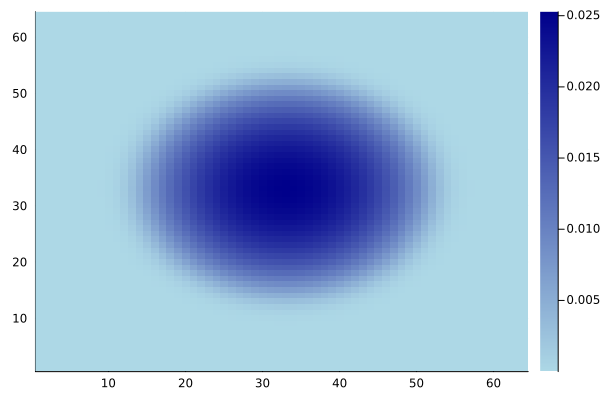

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)